In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/manthan0227/100-days-of-machine-learning/main/day29-sklearn-pipelines/train.csv')

In [3]:
df = df[['Age', 'Fare', 'Survived']]

In [4]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [5]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [8]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [9]:
X = df.iloc[:, 0:2]
y = df.iloc[:, 2]

In [10]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [11]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\python\python3.9.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


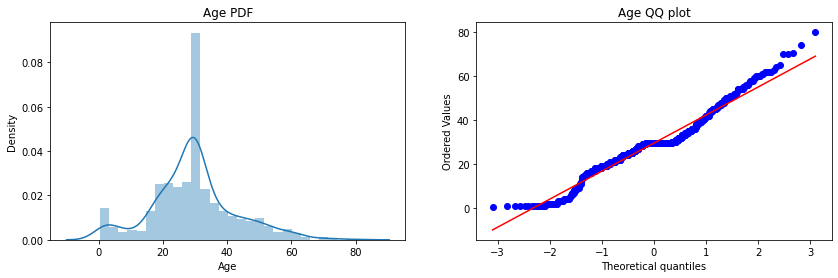

In [13]:
# Age plot
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

c:\python\python3.9.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


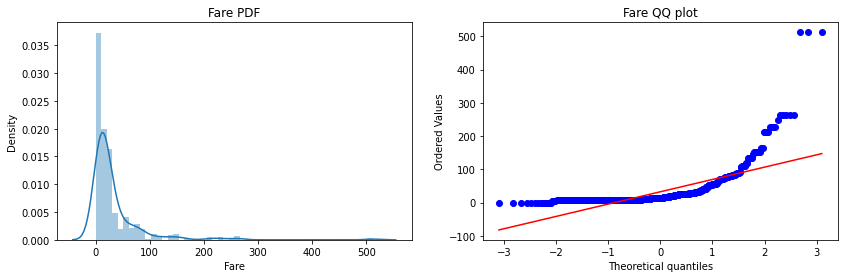

In [15]:
# Fare plot
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show() # Right skewed graph on PDF

In [20]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [22]:
clf.fit(X_train, y_train)
clf1.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print('Accuracy of Logistic Regression: ', accuracy_score(y_test, y_pred))
print('Accuracy of Decision Tree: ', accuracy_score(y_test, y_pred1))

Accuracy of Logistic Regression:  0.6480446927374302
Accuracy of Decision Tree:  0.6703910614525139


In [23]:
trf = FunctionTransformer(func=np.log1p)

In [24]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [27]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf1.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf1.predict(X_test_transformed)

print('Accuracy of Logistic Regression: ', accuracy_score(y_test, y_pred))
print('Accuracy of Decision Tree: ', accuracy_score(y_test, y_pred1))

Accuracy of Logistic Regression:  0.6815642458100558
Accuracy of Decision Tree:  0.6927374301675978


### After applying transformer, we get the better accuracy than before.

In [31]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print('LR: ', np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print('DT: ', np.mean(cross_val_score(clf1, X_transformed, y, scoring='accuracy', cv=10)))

LR:  0.678027465667915
DT:  0.6610986267166042


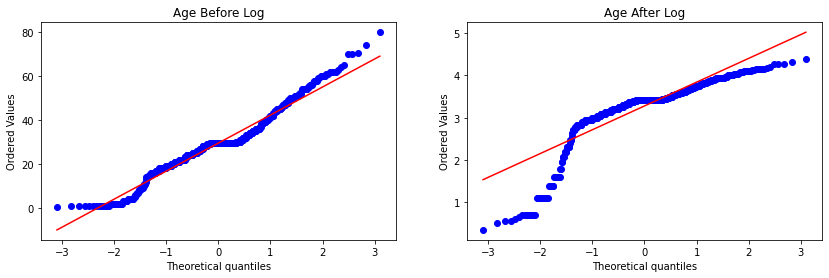

In [35]:
# plot difference before and after tranformer Age
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log')

plt.show()

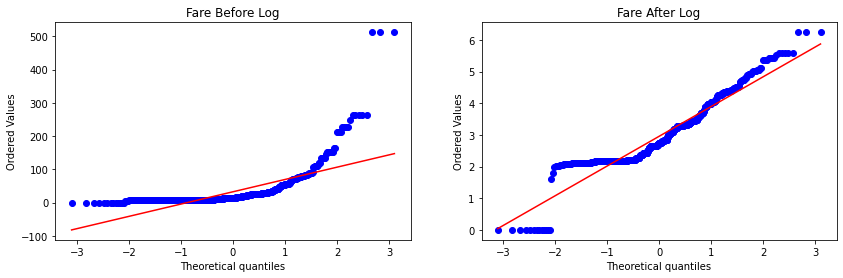

In [34]:
# plot difference before and after transformer on Fare
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log')

plt.show()

In [43]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p),['Age'])
], remainder='passthrough')


In [44]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [45]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf1.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf1.predict(X_test_transformed2)

print('Accuracy of Logistic Regression: ', accuracy_score(y_test, y_pred))
print('Accuracy of Decision Tree: ', accuracy_score(y_test, y_pred1))

Accuracy of Logistic Regression:  0.6480446927374302
Accuracy of Decision Tree:  0.6871508379888268


In [46]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print('LR: ', np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))
print('DT: ', np.mean(cross_val_score(clf1, X_transformed2, y, scoring='accuracy', cv=10)))     

LR:  0.6712484394506867
DT:  0.6510112359550562
